<a href="https://colab.research.google.com/github/Anshad-Aziz/technical-training/blob/main/Spotify_1M_tracks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import seaborn as sns
import random
from raceplotly.plots import barplot
import itertools


In [18]:
plt.style.use('seaborn-white')
plt.style.use('seaborn-pastel')
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (24,10)

<ipython-input-18-093715e6cf2c>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

<ipython-input-18-093715e6cf2c>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [19]:
data_df = pd.read_csv('spotify_data.csv', index_col=[0]).reset_index(drop=True)

In [20]:
data_df.sort_values('popularity', ascending = False, inplace = True)

In [21]:
data_df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [22]:
print(data_df.info())
# Inittial look of the data
data_df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159764 entries, 612503 to 646680
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159764 non-null  object 
 1   track_name        1159764 non-null  object 
 2   track_id          1159764 non-null  object 
 3   popularity        1159764 non-null  int64  
 4   year              1159764 non-null  int64  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence           1159764 non-null  float64
 

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
612503,Miley Cyrus,Flowers,0yLdNVWF3Srea0uzk55zFn,100,2023,pop,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455,4
605178,Bizarrap,"Shakira: Bzrp Music Sessions, Vol. 53",4nrPB8O7Y7wsOCJdgXkthe,96,2023,hip-hop,0.778,0.632,2,-5.600,0,0.0493,0.2740,0.000000,0.0915,0.498,122.104,218289,4
612504,The Weeknd,Die For You - Remix,7oDd86yk8itslrA9HRP2ki,95,2023,pop,0.531,0.525,1,-6.500,0,0.0671,0.2320,0.000000,0.4410,0.502,66.900,232857,4
569184,SZA,Kill Bill,1Qrg8KqiBpW07V7PNxwwwL,94,2022,pop,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947,4
569195,Manuel Turizo,La Bachata,5ww2BF9slyYgNOk37BlC4u,93,2022,pop,0.835,0.679,7,-5.329,0,0.0364,0.5830,0.000002,0.2180,0.850,124.980,162638,4


In [23]:
data_df.isna().sum()

artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [24]:
# Check number of unique vaues for all the columns
data_df.nunique()

artist_name           64159
track_name           882361
track_id            1159764
popularity               98
year                     24
genre                    82
danceability           1364
energy                 3116
key                      12
loudness              37368
mode                      2
speechiness            1655
acousticness           5398
instrumentalness       5402
liveness               1816
valence                2177
tempo                135697
duration_ms          258021
time_signature            5
dtype: int64

In [25]:
data_df.shape

(1159764, 19)

In [26]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159764 entries, 612503 to 646680
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159764 non-null  object 
 1   track_name        1159764 non-null  object 
 2   track_id          1159764 non-null  object 
 3   popularity        1159764 non-null  int64  
 4   year              1159764 non-null  int64  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence           1159764 non-null  float64
 

In [27]:
data_df["duration_mins"] = data_df["duration_ms"]/60000
data_df.drop(columns="duration_ms", inplace=True)

In [29]:
data_df.describe().apply(lambda s:s.apply('{0:.5f}'.format))

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
count,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000
mean,18.38312,2011.95500,0.53744,0.63967,5.28778,-8.98135,0.63465,0.09281,0.32154,0.25235,0.22302,0.45556,121.37714,3.88588,4.15936
std,15.88554,6.80390,0.18448,0.27050,3.55520,5.68221,0.48153,0.12684,0.35499,0.36507,0.20107,0.26852,29.77975,0.46770,2.49044
min,0.00000,2000.00000,0.00000,0.00000,0.00000,-58.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.03455
25%,5.00000,2006.00000,0.41300,0.45400,2.00000,-10.82900,0.00000,0.03710,0.00640,0.00000,0.09790,0.22600,98.79700,4.00000,3.01818
50%,15.00000,2012.00000,0.55000,0.69400,5.00000,-7.45000,1.00000,0.05070,0.14700,0.00176,0.13400,0.43800,121.93100,4.00000,3.76240
75%,29.00000,2018.00000,0.67700,0.87300,8.00000,-5.27600,1.00000,0.08900,0.64000,0.61400,0.29200,0.67400,139.90300,4.00000,4.78189
max,100.00000,2023.00000,0.99300,1.00000,11.00000,6.17200,1.00000,0.97100,0.99600,1.00000,1.00000,1.00000,249.99300,5.00000,100.00825


In [30]:
print(data_df[data_df['popularity']>=50]['popularity'].count()/data_df.shape[0])

0.04569033010164137


In [31]:
artists_df=data_df.groupby(by=['artist_name']).mean().reset_index().sort_values(by='popularity',ascending=False)
artists_df.head()

<ipython-input-31-963795e24250>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,artist_name,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
40069,NewJeans,85.333333,2022.166667,0.744667,0.679833,6.500000,-4.568833,0.166667,0.092817,0.279767,5.116667e-07,0.127300,0.604667,133.764333,4.0,3.251008
17200,Elley Duhé,85.000000,2020.000000,0.410000,0.611000,4.000000,-8.271000,0.000000,0.046700,0.022800,0.000000e+00,0.116000,0.089900,185.727000,3.0,3.074133
45960,Rema,80.666667,2021.000000,0.845000,0.748000,8.333333,-5.570667,0.666667,0.047133,0.319000,1.913000e-03,0.114333,0.786667,108.007000,4.0,3.549478
9719,Chani Nattan,80.000000,2021.000000,0.847000,0.558000,8.000000,-5.855000,0.000000,0.066300,0.325000,0.000000e+00,0.135000,0.495000,98.062000,4.0,2.184633
52681,SunKissed Lola,80.000000,2022.000000,0.710000,0.610000,2.000000,-4.674000,1.000000,0.035100,0.415000,2.670000e-05,0.181000,0.404000,120.032000,3.0,4.504167


In [32]:
popluar_max=data_df[data_df['popularity']>=90]['popularity'].count()
print(data_df[data_df['popularity']>=90][['artist_name','popularity']])

            artist_name  popularity
612503      Miley Cyrus         100
605178         Bizarrap          96
612504       The Weeknd          95
569184              SZA          94
569195    Manuel Turizo          93
541577     David Guetta          93
569191             Rema          93
608232         NewJeans          92
560200         Bizarrap          92
569188             d4vd          92
569190        Sam Smith          92
569187     Taylor Swift          92
77591    Arctic Monkeys          91
568440      OneRepublic          91
560194           Yandel          91
574169    Natanael Cano          91
569194  Stephen Sanchez          91
569192     Harry Styles          90
541578             RAYE          90
560181            Drake          90
377663      Chris Brown          90
569185             d4vd          90
569215            Ozuna          90
569186              SZA          90
817977           Eminem          90
615625       Peso Pluma          90
461991       The Weeknd     

In [33]:
year_df=data_df.groupby(by=['year']).mean().reset_index()
year_df

<ipython-input-33-377400f7cad1>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
0,2000,10.736181,0.528590,0.604446,5.289912,-10.148483,0.664464,0.084210,0.362329,0.239420,0.219137,0.507284,119.853731,3.876891,4.331459
1,2001,11.253359,0.524793,0.600322,5.304999,-10.097640,0.663715,0.085461,0.361939,0.245478,0.219772,0.488250,119.115111,3.874501,4.365222
2,2002,11.679041,0.531639,0.622776,5.305591,-9.587969,0.653152,0.085943,0.339893,0.243533,0.224506,0.498285,119.802349,3.885136,4.388925
3,2003,12.435730,0.526321,0.627254,5.283657,-9.375994,0.659200,0.087809,0.340997,0.240454,0.224276,0.491708,120.105939,3.875142,4.316647
4,2004,12.298732,0.530033,0.637659,5.299723,-9.109423,0.650196,0.087039,0.332912,0.228983,0.228731,0.491882,120.454719,3.886840,4.306355
5,2005,13.424920,0.525539,0.631740,5.320009,-9.267861,0.649223,0.088181,0.333991,0.241071,0.228456,0.487335,120.741856,3.877136,4.361092
6,2006,13.137903,0.533050,0.634384,5.322668,-9.139491,0.647051,0.089972,0.332268,0.248002,0.224144,0.486790,120.946902,3.884132,4.386501
7,2007,13.471446,0.533309,0.644446,5.321971,-9.028157,0.644595,0.092813,0.324328,0.251806,0.228937,0.478078,121.062447,3.885546,4.415313
8,2008,13.462894,0.534577,0.651215,5.297900,-8.763337,0.647306,0.090511,0.310635,0.258509,0.226360,0.476483,122.401332,3.888514,4.398722
9,2009,14.404596,0.535684,0.648119,5.276515,-8.807054,0.645736,0.092920,0.312339,0.268276,0.229907,0.469708,122.052401,3.881371,4.427241


In [35]:
df_melt = year_df.melt(id_vars='year', value_vars=['acousticness', 'danceability','energy',
         'instrumentalness', 'liveness', 'valence', 'speechiness'])

In [36]:
px.line(df_melt,x='year',y='value',color='variable',labels={
    'year':'Year',
    'value':'Value',
    'variable':'Variables'
},log_x=True,title='Trend of variables over the year 2000 to 2023'
        )

In [37]:
pop_df=data_df.groupby(by=['year']).popularity.mean().reset_index()
pop=pop_df.melt(id_vars='year',value_vars=['popularity'])
px.line(pop,x='year',y='value',color='variable',
        labels={
            "year":"Year",
            "value":"value",
            "variable":""

        },
        log_x=True,
        title='popularity over time')

In [38]:
popularity_df = year_df[['year','popularity']]

# Convert the data type of year to Datetime
popularity_df['year'] = pd.to_datetime(popularity_df['year'], format = '%Y')

# Set the index as year
popularity_df.set_index('year',inplace = True)

popularity_df.head()


<ipython-input-38-27a3651e05c8>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,popularity
year,
2000-01-01,10.736181
2001-01-01,11.253359
2002-01-01,11.679041
2003-01-01,12.435730
2004-01-01,12.298732


In [39]:
data_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
count,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000,1159764.00000
mean,18.38312,2011.95500,0.53744,0.63967,5.28778,-8.98135,0.63465,0.09281,0.32154,0.25235,0.22302,0.45556,121.37714,3.88588,4.15936
std,15.88554,6.80390,0.18448,0.27050,3.55520,5.68221,0.48153,0.12684,0.35499,0.36507,0.20107,0.26852,29.77975,0.46770,2.49044
min,0.00000,2000.00000,0.00000,0.00000,0.00000,-58.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.03455
25%,5.00000,2006.00000,0.41300,0.45400,2.00000,-10.82900,0.00000,0.03710,0.00640,0.00000,0.09790,0.22600,98.79700,4.00000,3.01818
50%,15.00000,2012.00000,0.55000,0.69400,5.00000,-7.45000,1.00000,0.05070,0.14700,0.00176,0.13400,0.43800,121.93100,4.00000,3.76240
75%,29.00000,2018.00000,0.67700,0.87300,8.00000,-5.27600,1.00000,0.08900,0.64000,0.61400,0.29200,0.67400,139.90300,4.00000,4.78189
max,100.00000,2023.00000,0.99300,1.00000,11.00000,6.17200,1.00000,0.97100,0.99600,1.00000,1.00000,1.00000,249.99300,5.00000,100.00825


<ipython-input-47-b9e0a868577f>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 0, 'popularity')

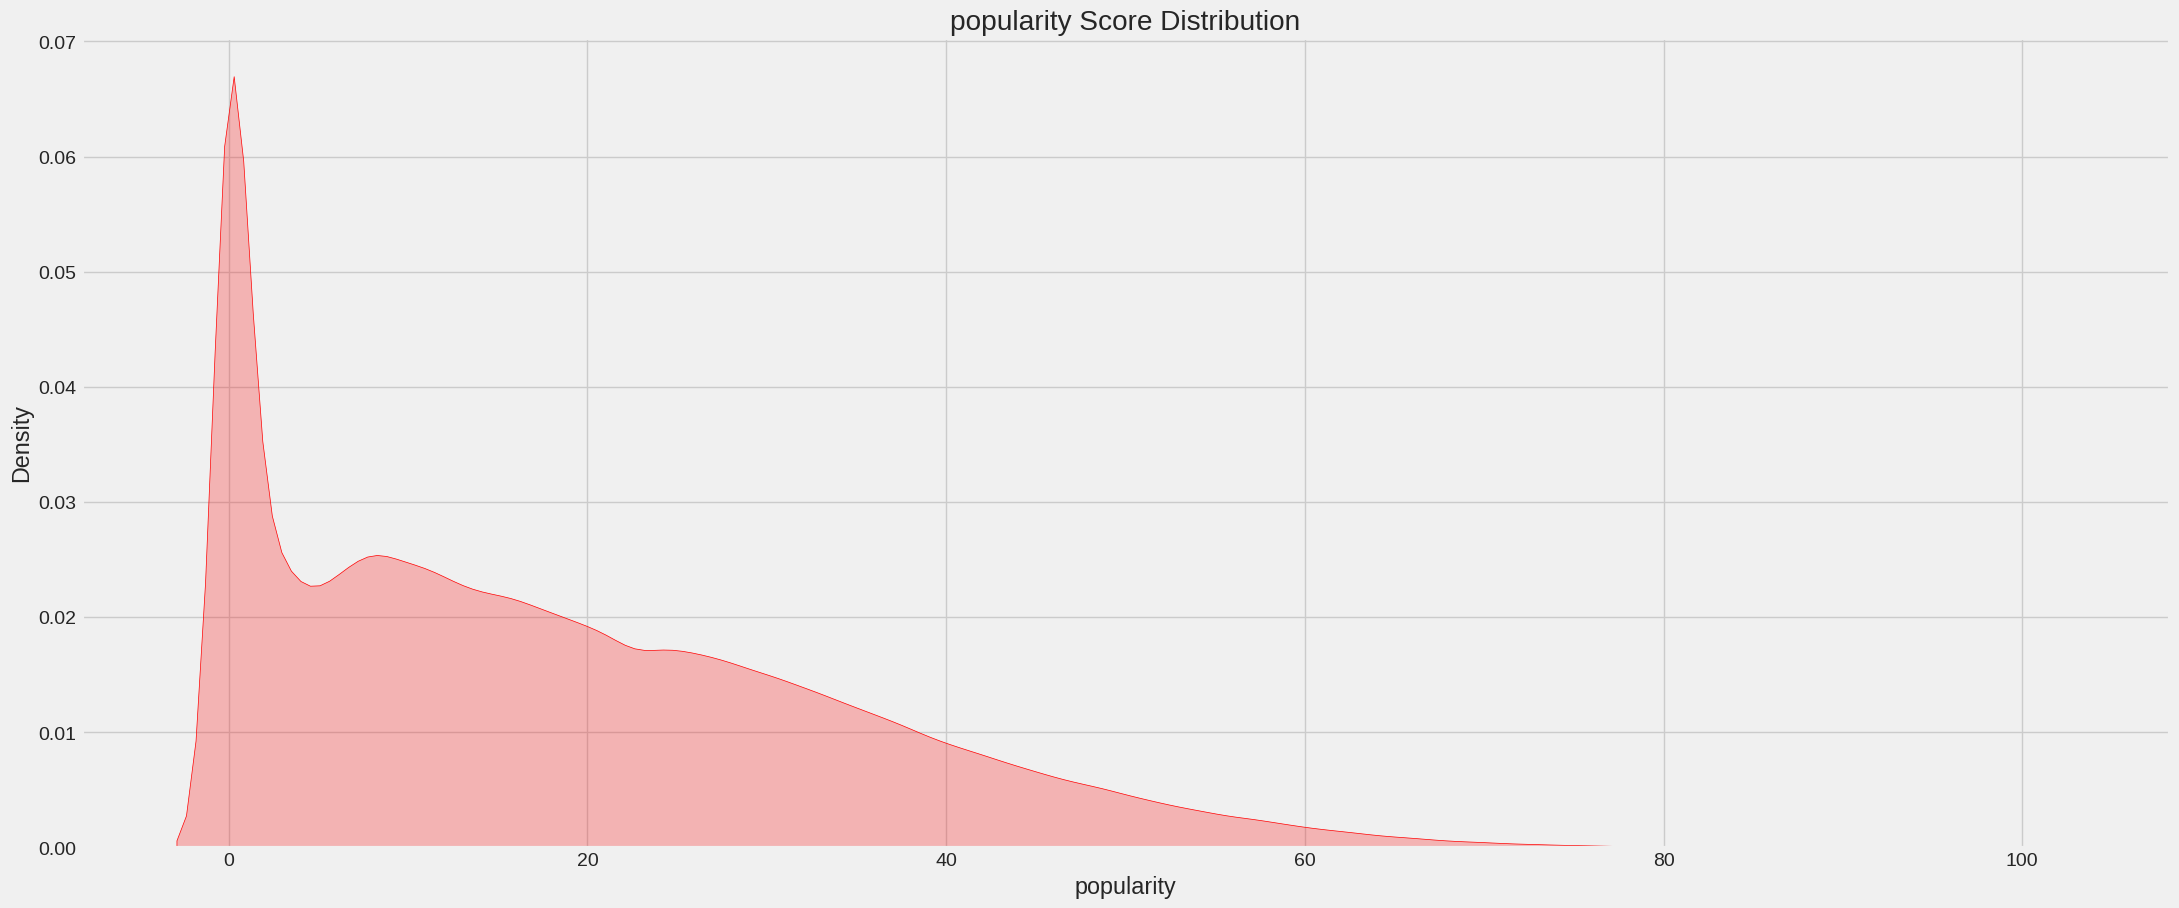

In [47]:
ax=sns.kdeplot(data_df['popularity'],shade=True,color='red')
plt.title("popularity Score Distribution")
plt.xlabel("popularity")

In [48]:
fig = px.histogram(data_df, x="popularity", nbins=20,text_auto=True)
fig.update_layout(
    title='Distribution of Popularity Scores',
    xaxis = dict(
        title='Popularity Score',
        tickmode = 'linear',
        tick0 = 9,
        dtick = 9
    ),
    yaxis=dict(title='Count')

)

fig.show()

<ipython-input-49-52cf75ec2690>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



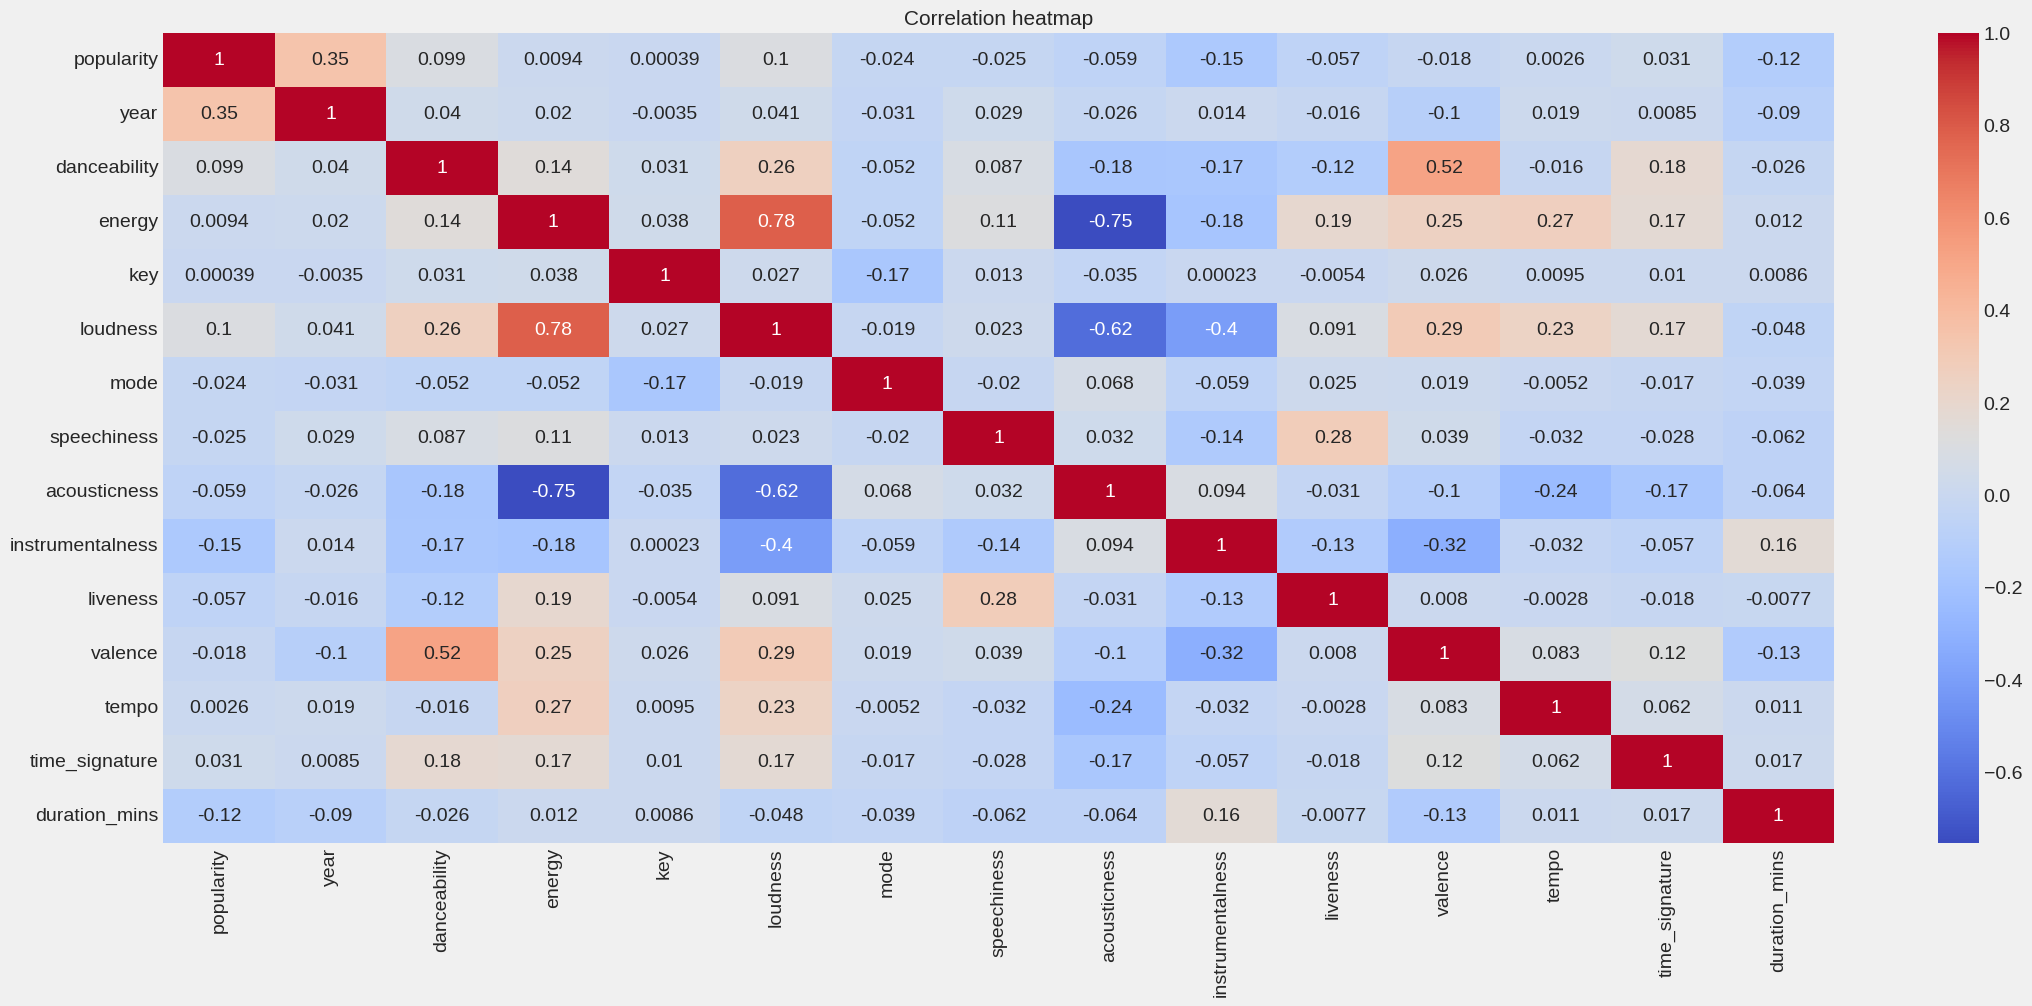

In [49]:
sns.heatmap(data_df.corr(),cmap="coolwarm",annot=True)
plt.title('Correlation heatmap',size=15);
plt.show()

In [41]:
# Calculate the average popularity for each genre
avg_popularity_by_genre = data_df.groupby('genre')['popularity'].mean().reset_index()

In [42]:
# Sort genres by average popularity
sorted_genres = avg_popularity_by_genre.sort_values('popularity', ascending=False)

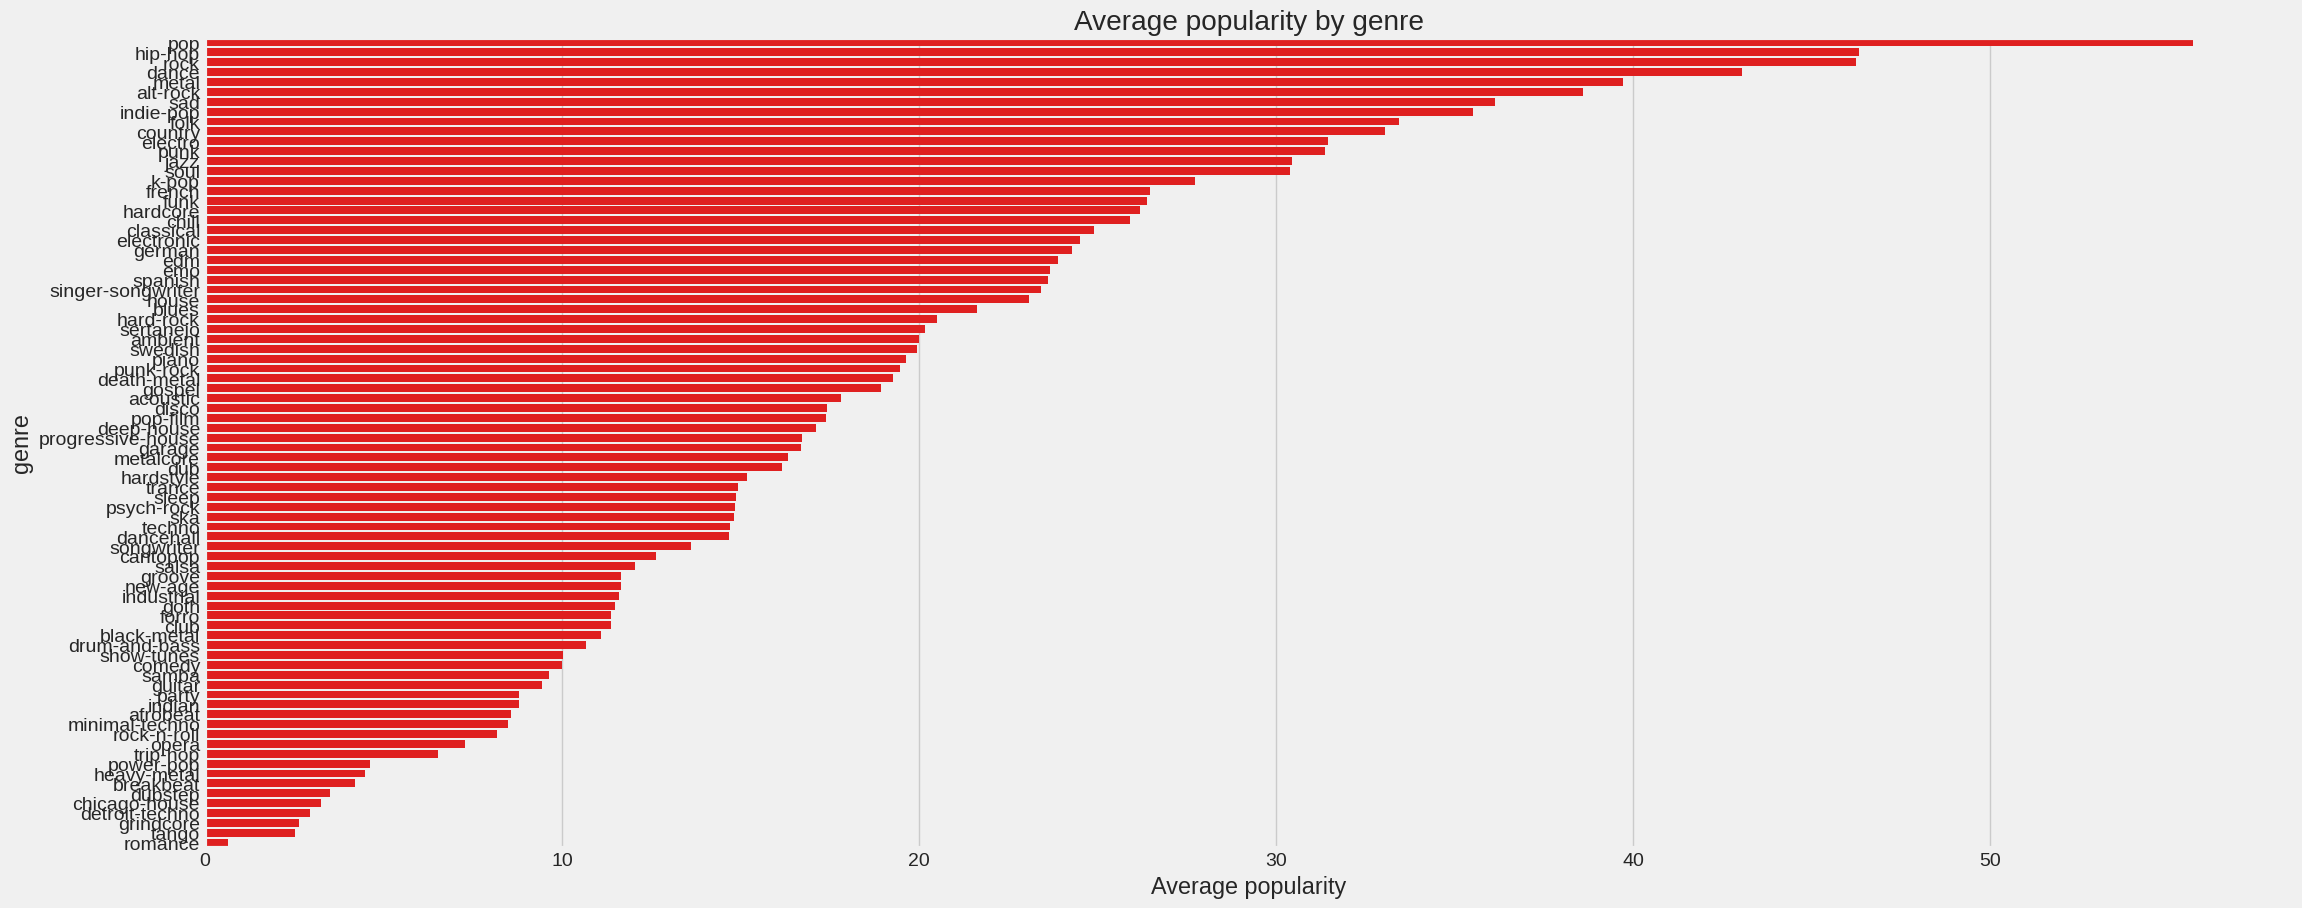

In [46]:
sns.barplot(x='popularity',y='genre',data=sorted_genres,color='red')
plt.xlabel('Average popularity')
plt.ylabel('genre')
plt.title('Average popularity by genre')
plt.show()

In [54]:
genre_df = data_df.groupby(['genre','year'])['popularity'].median().reset_index()

In [52]:
my_raceplot = barplot(genre_df,
                      item_column='genre',
                      value_column='popularity',
                      time_column='year'
             )

In [55]:
fig=my_raceplot.plot(
                 item_label = 'Genre',
                 value_label = 'Popularity',
                 frame_duration = 900)

In [56]:
fig.update_layout(
      title='Top 10 most popular Genre from 2000 to 2023',
      title_x=0.15,
      width=1000,
      height=530,
      paper_bgcolor="white",
      )

In [57]:
def recommend_artists(feature):
  recomendation=artists_df[artists_df[feature]>artists_df[feature].quantile(0.9)].sort_values(by='popularity',ascending=False)
  return recomendation.head(3)

In [58]:
artists_df.head(3)

,artist_name,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
40069,NewJeans,85.333333,2022.166667,0.744667,0.679833,6.500000,-4.568833,0.166667,0.092817,0.279767,5.116667e-07,0.127300,0.604667,133.764333,4.0,3.251008
17200,Elley Duhé,85.000000,2020.000000,0.410000,0.611000,4.000000,-8.271000,0.000000,0.046700,0.022800,0.000000e+00,0.116000,0.089900,185.727000,3.0,3.074133
45960,Rema,80.666667,2021.000000,0.845000,0.748000,8.333333,-5.570667,0.666667,0.047133,0.319000,1.913000e-03,0.114333,0.786667,108.007000,4.0,3.549478


In [59]:
recommend_artists('danceability')

,artist_name,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
45960,Rema,80.666667,2021.0,0.845,0.748,8.333333,-5.570667,0.666667,0.047133,0.319,0.001913,0.114333,0.786667,108.007,4.0,3.549478
9719,Chani Nattan,80.000000,2021.0,0.847,0.558,8.000000,-5.855000,0.000000,0.066300,0.325,0.000000,0.135000,0.495000,98.062,4.0,2.184633
15238,Dj LK da Escócia,78.000000,2022.0,0.889,0.742,4.000000,-3.495000,0.000000,0.358000,0.299,0.000568,0.066000,0.479000,130.089,4.0,2.484617


In [60]:
# Top 3 Popluar artists with high energy:
recommend_artists('energy')

,artist_name,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
63603,yama,71.000000,2022.000000,0.581000,0.926000,7.000000,-3.2680,0.000000,0.066200,0.176000,0.000000,0.251000,0.874,117.040000,4.0,3.202933
34967,Majestic,69.500000,2021.500000,0.691000,0.926500,8.500000,-3.2985,0.000000,0.138000,0.002312,0.002080,0.253000,0.770,128.027000,4.0,2.775492
1267,Ado,64.666667,2021.333333,0.561333,0.966333,7.666667,-2.4330,0.333333,0.133267,0.042283,0.000001,0.196333,0.401,161.035667,4.0,3.483111


In [61]:
recommend_artists('valence')

,artist_name,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
45960,Rema,80.666667,2021.0,0.845,0.748,8.333333,-5.570667,0.666667,0.047133,0.319,0.001913,0.114333,0.786667,108.007,4.0,3.549478
42143,Oxlade,79.000000,2022.0,0.649,0.655,10.000000,-5.534000,0.000000,0.065200,0.307,0.000000,0.220000,0.793000,92.900,4.0,2.459683
50953,Soegi Bornean,78.000000,2019.0,0.721,0.565,4.000000,-6.208000,1.000000,0.029200,0.855,0.000005,0.097300,0.794000,139.941,4.0,4.247700


In [62]:
# Top 3 Popluar artists with high instrumentalness:
recommend_artists('instrumentalness')

,artist_name,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
20584,Gaea Antoniou,68.0,2021.0,0.0802,0.00761,2.0,-32.863,1.0,0.0497,0.975000,0.9000,0.1120,0.0623,172.6760,4.0,2.950000
48983,Sean Altar,67.0,2022.0,0.1800,0.01870,0.0,-31.807,1.0,0.0440,0.969000,0.9160,0.1280,0.0339,71.1350,3.0,2.314283
63179,jagger finn,65.5,2019.0,0.5250,0.53700,0.0,-9.635,1.0,0.0276,0.463315,0.8495,0.1875,0.3915,92.0495,4.0,2.222758
